<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/05b-eda-penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# Palmer Penguins Dataset: Overview

The Palmer Penguins dataset contains data about three species of penguins observed in the Palmer Archipelago, Antarctica. The dataset was collected by Dr. Kristen Gorman and the Palmer Station LTER (Long Term Ecological Research) Program. It serves as a popular alternative to the Iris dataset for data exploration, statistical analysis, and machine learning practice due to its richer set of features and categorical variables.

Objective:

The primary goal of working with the Palmer Penguins dataset is to explore relationships between penguin species and their physical characteristics, as well as to perform classification tasks, such as predicting the species of a penguin based on measurable features. The dataset also offers an opportunity to practice data cleaning and handling missing values, as there are some missing entries.

Dataset Features:

The dataset consists of 344 rows and 7 columns. The columns are:

	1.	species: Categorical feature indicating the penguin species (Adélie, Chinstrap, Gentoo).
	2.	island: Categorical feature representing the island where the penguin was observed (Biscoe, Dream, Torgersen).
	3.	bill_length_mm: Continuous numerical feature representing the length of the penguin’s bill (in millimeters).
	4.	bill_depth_mm: Continuous numerical feature representing the depth of the penguin’s bill (in millimeters).
	5.	flipper_length_mm: Continuous numerical feature representing the penguin’s flipper length (in millimeters).
	6.	body_mass_g: Continuous numerical feature representing the penguin’s body mass (in grams).
	7.	sex: Categorical feature indicating the penguin’s sex (male or female), though some entries are missing.


## As you work through the below steps, keep track of (write down) any questions that come to mind. Seek to answer these questions using the data!

1.	Understand the Data:
	* The dataset is loaded from seaborn.
	* First few rows and data types are printed.
	* Missing values are checked.
2.	Detect and Address Outliers and Missing Values:
	* Visualizing missing values using a heatmap.
  * Boxplots for detecting potential outliers.
	* Decide whether to drop or impute missing values.
3.	Describe Shape of Data using Univariate Analysis:
	* Histograms for numerical variables to check distributions.
	* Count plots for categorical variables like species.
4.	Identify Feature Relationships using Bivariate Analysis:
	* Scatter plots and pair plots to visualize relationships between numerical variables and categories.
	* Correlation matrix heatmap to examine the relationships between numerical variables.
5.	Multivariate Analysis:
	* Grouping box plots to compare flipper lengths across species and gender.
6.  What other questions come to mind?

In [40]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [48]:
# Load the Palmer Penguins dataset from seaborn
penguins = sns.load_dataset('penguins')
#1
print(penguins.isnull().sum())
print([penguins.iloc[0:3]])


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
[  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  ]


    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen        3.666122       2.928524           5.198497   
1    Adelie  Torgersen        3.676301       2.856470           5.225747   
2    Adelie  Torgersen        3.696351       2.890372           5.273000   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen        3.602777       2.960105           5.262690   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe        3.845883       2.660260           5.370638   
341  Gentoo     Biscoe        3.919991       2.753661           5.402677   
342  Gentoo     Biscoe        3.811097       2.694627           5.356586   
343  Gentoo     Biscoe        3.910021       2.778819           5.361292   

     body_mass_g     sex  
0       8.229511    Male  
1       8.242756  Female  
2     

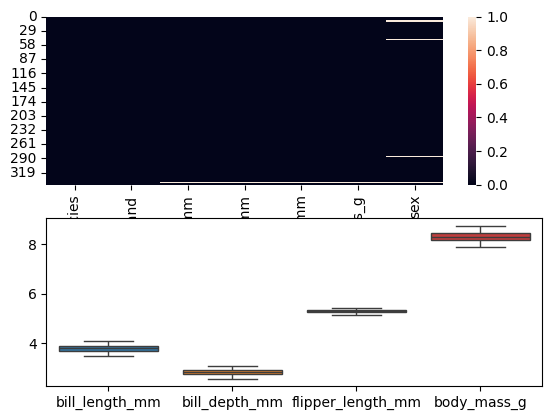

In [49]:
#2
plt.subplot(2,1,1)
fig1 = sns.heatmap(penguins.isna())

penguins_log = penguins.copy()
penguins_log[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']] = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].apply(np.log)
print(penguins_log)
plt.subplot(2,1,2)
fig2 = sns.boxplot(penguins_log)
# penguins.dropna(inplace = False)

array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

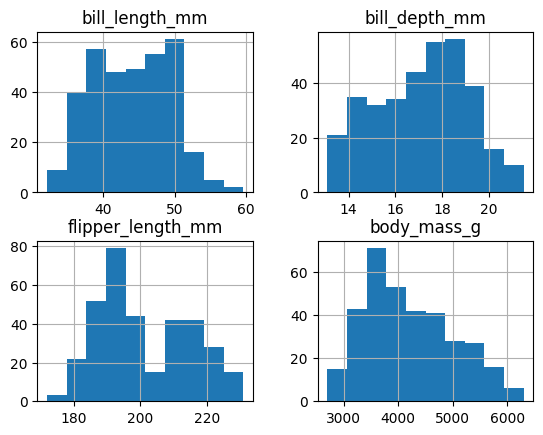

In [56]:
#3
penguins.hist()

<Axes: xlabel='sex', ylabel='count'>

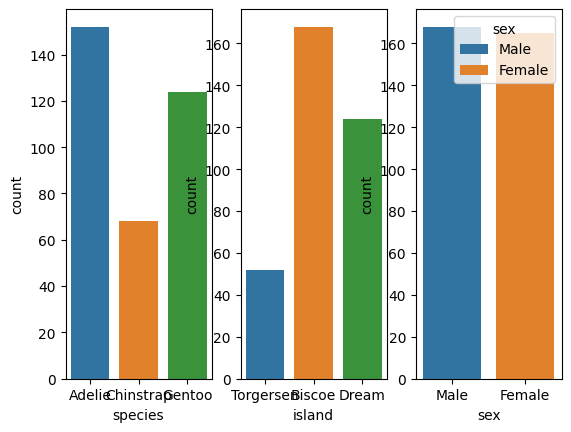

In [60]:
plt.subplot(1,3,1)
sns.countplot(penguins, x = 'species', hue = 'species')
plt.subplot(1,3,2)
sns.countplot(penguins, x = 'island', hue = 'island')
plt.subplot(1,3,3)
sns.countplot(penguins, x = 'sex', hue = 'sex')